In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
NUM_ROWS = 28
NUM_COLS = 28
num_classes = 10


# LOAD the MNIST data from Keras, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(60000,)


# Encoding Labels

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:

# Reshape x_train and x_test
x_train = np.reshape(x_train,(x_train.shape[0],NUM_ROWS*NUM_COLS))
x_test = np.reshape(x_test,(x_test.shape[0],NUM_ROWS*NUM_COLS))

In [ ]:
# Have first 10000 images as a validatin data and leave the rest as training
x_val = x_train[:10000]
x_train = x_train[10000:]
y_val = y_train[:10000]
y_train = y_train[10000:]

In [ ]:
print("Shape of training data ",x_train.shape)
print("Shape of training labels ",y_train.shape)
print("Shape of validiation data ",x_val.shape)
print("Shape of validiation labels ",y_val.shape)
print("Shape of test data ",x_test.shape)
print("Shape of test labels ",y_test.shape)

Shape of training data  (50000, 784)
Shape of training labels  (50000, 10)
Shape of validiation data  (10000, 784)
Shape of validiation labels  (10000, 10)
Shape of test data  (10000, 784)
Shape of test labels  (10000, 10)


In [ ]:
#x_train = keras.utils.normalize(x_train)
#x_val = keras.utils.normalize(x_val)         -------->normalization /255
#x_test = keras.utils.normalize(x_test)

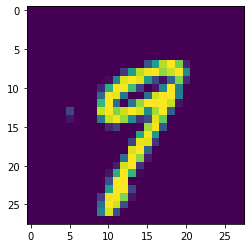

In [ ]:
# Plot an image like below from the Training size
plotting_image = x_train[55]
plotting_image = np.reshape(plotting_image,(28,28))
plt.imshow(plotting_image)

# Build and train a Sequential Model

In [ ]:
# load necessary Keras modules for building a sequantial model
from keras import layers,models
from keras.layers import Dense

In [ ]:
# Build the model first
model = models.Sequential()
model.add(Dense(units=25,input_shape=(784,)))
model.add(layers.Activation('relu'))
model.add(Dense(units=25))
model.add(layers.Activation('relu'))
model.add(Dense(units=10))
model.add(layers.Activation('softmax'))

In [ ]:
# Configure the model with a categorical_crossentropy and stochastic gradient descent optimizer and observe 
# metrics as accuracy

model.compile(optimizer=keras.optimizers.SGD(),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
model.summary()
model.output_shape

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                19625     
                                                                 
 activation (Activation)     (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 activation_1 (Activation)   (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                260       
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 20,535
Trainable params: 20,535
Non-traina

(None, 10)

In [ ]:
# Train your model with training and validatin datasets and have only 1 epoch with a batch size of 32
history=model.fit(x_train,y_train,epochs=1,validation_data=(x_val,y_val),batch_size=32)

1563/1563 [==============================] - 10s 4ms/step - loss: 2.2163 - accuracy: 0.2495 - val_loss: 2.0672 - val_accuracy: 0.3888


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.0648 - accuracy: 0.3833


[2.0648033618927, 0.3833000063896179]

# Plot losses with a third party library which will help you generate interactive performance metrics. Make sure you have the call back function invoked with variable PlotLossesCallback below

In [ ]:
!pip install livelossplot

     |████████████████████████████████| 793 kB 38.1 MB/s 
     |████████████████████████████████| 381 kB 54.8 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.33.0 which is incompatible.


In [ ]:
!ls

sample_data


In [ ]:
from livelossplot.keras import PlotLossesCallback

In [ ]:
model.compile(optimizer="sgd",loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

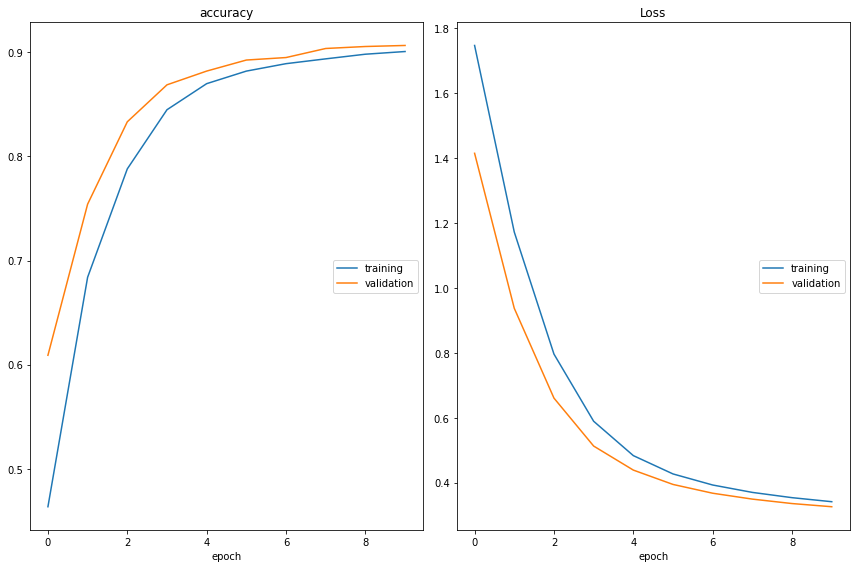

accuracy
	training         	 (min:    0.464, max:    0.901, cur:    0.901)
	validation       	 (min:    0.609, max:    0.906, cur:    0.906)
Loss
	training         	 (min:    0.341, max:    1.747, cur:    0.341)
	validation       	 (min:    0.326, max:    1.415, cur:    0.326)
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3412 - accuracy: 0.9007 - val_loss: 0.3257 - val_accuracy: 0.9065


In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=32,callbacks=[PlotLossesCallback()],validation_data=(x_val,y_val))

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3226 - accuracy: 0.9071


[0.3225690424442291, 0.9071000218391418]

# Convolutional Neural Network for MNIST

In [ ]:
#Load the necessary modules from Keras that will be used in CNN training
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense



In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_val = x_val.reshape(x_val.shape[0],28,28,1)
x_test = x_val.reshape(x_test.shape[0],28,28,1)

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#x_train = keras.utils.normalize(x_train)
#x_val = keras.utils.normalize(x_val)
#x_test = keras.utils.normalize(x_test)

In [ ]:
# Build your model according to details given in the World document
model2 = keras.Sequential()
model2.add(Convolution2D(32,kernel_size=(5,5),strides=1,padding='same',activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Convolution2D(64,kernel_size=(5,5),strides=1,padding='same',activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Convolution2D(128,kernel_size=(5,5),strides=1,padding='same',activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Flatten())
model2.add(Dense(100,activation='relu'))
model2.add(Dense(10,activation='softmax'))

In [ ]:
model2.compile(loss="categorical_crossentropy", optimizer = "sgd", metrics =["accuracy"])

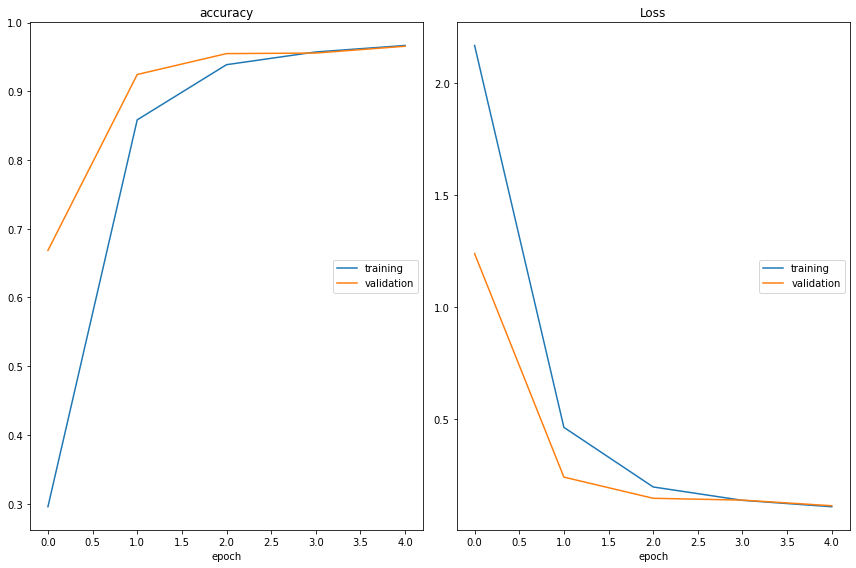

accuracy
	training         	 (min:    0.296, max:    0.967, cur:    0.967)
	validation       	 (min:    0.669, max:    0.965, cur:    0.965)
Loss
	training         	 (min:    0.108, max:    2.168, cur:    0.108)
	validation       	 (min:    0.113, max:    1.239, cur:    0.113)
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1084 - accuracy: 0.9666 - val_loss: 0.1128 - val_accuracy: 0.9655


In [ ]:
# Train the network with both training and validation data with epoch size of 5 and batch size of 32
model2.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=5,callbacks=[PlotLossesCallback()])